## Set up

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

import pandas as pd
import open3d as o3d
import numpy as np
import math

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
# %matplotlib auto
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "png_images")
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")
os.makedirs(IMAGES_PATH, exist_ok=True)


## function for automatically save the diagram/graph into the folder 
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
## File IO
print("Testing IO for point cloud ...")

##--------------read point cloud data, save to a open3d object--------------
pcd = o3d.io.read_point_cloud(os.path.join(DATA_PATH, "Point_cloud.pcd"))

# ---- using numpy to print all the points -------
points_np_array = np.asarray(pcd.points)
print("the points are: \n")
print(points_np_array)
#------extract x,y,z value of the points-----
x = points_np_array[:,0]
y = points_np_array[:,1]
points_np_array[:,2] = points_np_array[:,2] - np.amin(points_np_array[:,2]) 
z = points_np_array[:,2]
print("the z value extracted: \n" )
print (z)

# --------mean height-------------------
z_mean = np.mean(z)
z_mean = z_mean + 0.17
print("Z mean: " + str(z_mean))

z_min = np.amin(z)
print ("Z minimum: "+ str(z_min))
print ("Z max: "+ str(np.amax(z)))

Testing IO for point cloud ...
the points are: 

[[ -10.13915588  -19.27032314 -226.7965633 ]
 [ -10.13968095  -19.19431511 -226.762755  ]
 [ -10.14048379  -19.1195331  -226.7369091 ]
 ...
 [  10.17310155   19.43268697 -227.109935  ]
 [  10.17420343   19.51052893 -227.1563463 ]
 [  10.17346534   19.58841296 -227.1986699 ]]
the z value extracted: 

[0.5311229 0.5649312 0.5907771 ... 0.2177512 0.1713399 0.1290163]
Z mean: 1.3412846339042892
Z minimum: 0.0
Z max: 1.710219699999982


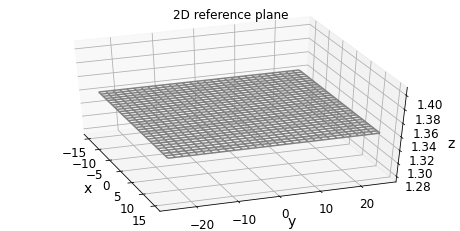

In [4]:
x_plane = np.linspace(-15, 15, 30)
y_plane = np.linspace(-25, 25, 30)

def z_function(x, y):
    # ax+by+cz = d ---> z = -(ax+by-d)/c
    return  z_mean + 0 * x + 0 * y       

# create a plane with meshgrid (mainly for visualization purpose)
# x_plane = np.linspace(-11, 11, 30)
# y_plane = np.linspace(-21, 21, 30)
x_plane = np.linspace(-15, 15, 30)
y_plane = np.linspace(-25, 25, 30)

X, Y = np.meshgrid(x_plane, y_plane)
Z = z_function(X, Y) # the Z value (height) of the nominal plane is equal to the mean Z value of the point l
#print (X, Y, Z)


plt.figure(figsize=(8, 4))
ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_wireframe(X, Y, Z, color='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('2D reference plane')

ax.view_init(elev=40,azim=-20) #rotate the graph
# save_fig("01_reference_plane")

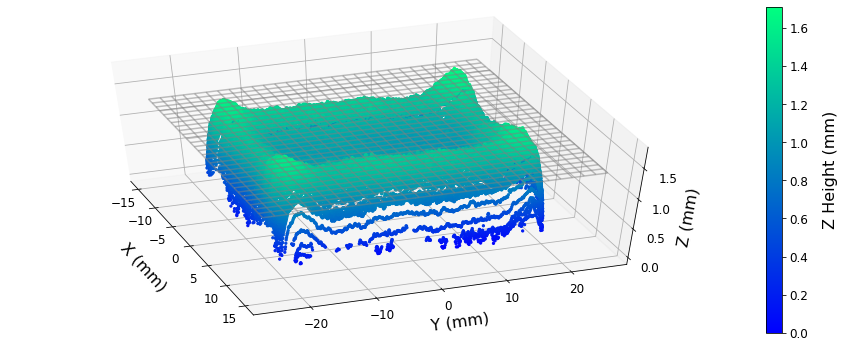

In [5]:
plt.figure(figsize=(16, 6))
# plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# zline = np.linspace(0, 15, 1000)
# xline = np.sin(zline)
# yline = np.cos(zline)
# ax.plot3D(xline, yline, zline, 'gray')

ax.plot_wireframe(X, Y, Z, color='gray',  alpha=0.5)
# Data for three-dimensional scattered points, extracted from numpy array
p = ax.scatter3D(x, y, z, c=z, cmap='winter', s = 5, alpha=1.0) # other cmap options: winter, Greens
cbar = plt.colorbar(p)
# cbar.ax.set_ticks(np.arange(0, 2, 0.5))
cbar.set_label("Z Height (mm)", fontsize=16, labelpad=15)
ax.set_xlabel('X (mm)', fontsize=16, labelpad=15)
ax.set_ylabel('Y (mm)', fontsize=16,labelpad=15)
ax.set_zlabel('Z (mm)', fontsize=16, labelpad=5);
ax.set_zticks(np.arange(0, 2, 0.5))

# plt.title('3D Point cloud and reference plane')
ax.view_init(elev=50,azim=-20) #rotate the graph

the point cloud segmented: 


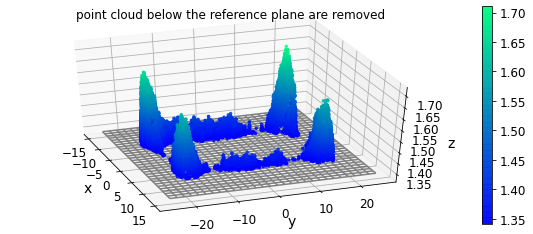

In [6]:
points_segmented = points_np_array[np.where(points_np_array[:,2] > z_mean)] # should be z_mean here

print("the point cloud segmented: ")

x_seg = points_segmented[:,0]
y_seg = points_segmented[:,1]
z_seg = points_segmented[:,2]

plt.figure(figsize=(10, 4))
# plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(X, Y, Z, color='gray')
# Data for three-dimensional scattered points, extracted from numpy array
p = ax.scatter3D(x_seg, y_seg, z_seg, c=z_seg, cmap='winter', s = 6, alpha = 0.8); # other cmap options: winter, Greens
plt.colorbar(p)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('point cloud below the reference plane are removed')
ax.view_init(elev=40,azim=-20) #rotate the graph

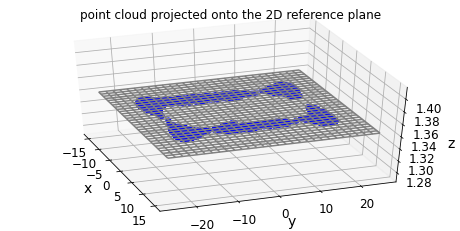

In [7]:
## set the z = z_mean for all the points
point_extracted = points_segmented
point_extracted[:,2] = z_mean

x_2d = point_extracted[:,0]
y_2d = point_extracted[:,1]
z_2d = point_extracted[:,2]


plt.figure(figsize=(8, 4))
# plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(X, Y, Z, color='gray')
# Data for three-dimensional scattered points, extracted from numpy array
ax.scatter3D(x_2d, y_2d, z_2d, c=z_2d, cmap='winter'); # other cmap options: winter, Greens
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('point cloud projected onto the 2D reference plane')
ax.view_init(elev=40,azim=-20) #rotate the graph

In [8]:
print ("point_extracted number of points: " + str(point_extracted.shape[0]))
point_2D_extracted = np.zeros((point_extracted.shape[0], 2))
point_2D_extracted[:, 0] = point_extracted[:, 0]
point_2D_extracted[:, 1] = point_extracted[:, 1]
print ("point_2D_extracted dimensin: " + str(point_2D_extracted.shape))

point_extracted number of points: 17510
point_2D_extracted dimensin: (17510, 2)


In [9]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.8, min_samples=10).fit(point_2D_extracted)
# db = DBSCAN(eps=1, min_samples=10).fit(extracted_2D_downsampled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

point_clusters = []
cluster = 0 
while cluster < n_clusters_:
    
    class_member_mask = (labels == cluster)
    point_clusters.append(point_2D_extracted[class_member_mask & core_samples_mask])
#     point_clusters.append(extracted_2D_downsampled[class_member_mask & core_samples_mask])
    cluster = cluster + 1

Estimated number of clusters: 5
Estimated number of noise points: 16


In [10]:
pts = point_clusters[1]

In [11]:
import bisect
from collections import OrderedDict
import math
#import numpy as np
import matplotlib.tri as tri
from shapely.geometry import LineString
from shapely.geometry import Polygon
from shapely.ops import linemerge

In [12]:
tol=4

temp = list(zip(*pts))
x, y = list(temp[0]), list(temp[1])
del(temp)

triang = tri.Triangulation(x, y)

Saving figure Algorithm: delaunay triangulation


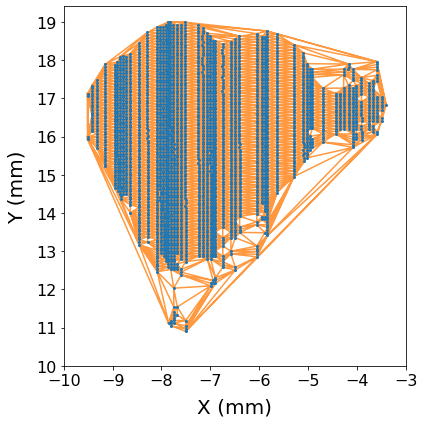

In [14]:
# Plotting the output
plt.figure(figsize=(6, 6))
plt.plot(point_clusters[1][:, 0], point_clusters[1][:, 1], '.', ms = 4, alpha = 1.0)
plt.triplot(triang, ms = 1, alpha = 0.8)

plt.xlabel('X (mm)', fontsize=20, labelpad=10)
plt.ylabel('Y (mm)', fontsize=20, labelpad=10)
plt.xticks(np.arange(-10, -2, 1), fontsize = 16)
plt.yticks(np.arange(10, 20, 1), fontsize = 16)



# plt.title("Boundary point of of the point cluster 0 \n (the boundary points in red)")
save_fig("Algorithm: delaunay triangulation")
plt.show()

### To visualise the triangles with no neighbours (outer triangles)

In [15]:
all_triangles = {}

'''
triangles(ntri, 3) array-like of int
For each triangle, the indices of the three points that make up the triangle, 
ordered in an anticlockwise manner. If not specified, the Delaunay triangulation is calculated.

neighbors For each triangle, the indices of the three triangles that share the same edges, or -1 if there is no such neighboring triangle. 
neighbors[i, j] is the triangle that is the neighbor to the edge from point index triangles[i, j] to point index triangles[i, (j+1)%3].

mask(ntri,) array-like of bool, optional
Which triangles are masked out.

'''



# produce the list of triangles
for i, triangle in enumerate(triang.triangles):
    all_triangles[i] = [list(triangle), list(triang.neighbors[i])] #notice only one neighbour is selected here
print (i)

# masked_triangles = np.ones(i, dtype=bool)

# i is just the index, triangle is each triangle element, (itself, neighbour)
for i, triangle in all_triangles.items():
#     if i == 88:
#         print (triangle[0]) # this means itself
#         print (triangle[1]) # this means its  neighbour
#     # if no neighbour     
#     if -1 in triangle[1]:
#         print("This is when -1 happens (the edge point has no neighbour)")
#         print (triangle)
#         # triangle[1] is the ne
#         for pos, neigh in enumerate(triangle[1]):
#             # pose - 0,1,2 neighbour - which point is this points' neighbour
#             print ("position, neighbour")
#             print (pos, neigh)
            
    if -1 in triangle[1] and triangle[1].count(-1) == 1:
        print ("only one point without neighbour")
        print (triangle)
    if -1 in triangle[1] and triangle[1].count(-1) > 1: 
        print ("more points")
        print (triangle)
    
#           masked_triangles[count] = [triangle]
#           masked_triangles[i] = True
        
        
# # Plotting the output
# plt.figure(figsize=(4, 3))
# plt.plot(point_clusters[1][:, 0], point_clusters[1][:, 1], '.', ms = 4, alpha = 1.0)
# plt.triplot(x, y, triangle)
# # save_fig("Algorithm: delaunay triangulation - Cluster1")
# plt.show()

6051
only one point without neighbour
[[0, 905, 399], [-1, 84, 7]]
only one point without neighbour
[[3007, 2282, 1375], [1, 10, -1]]
only one point without neighbour
[[3007, 3026, 3008], [-1, 344, 154]]
only one point without neighbour
[[3, 0, 1], [-1, 120, 14]]
only one point without neighbour
[[3034, 3025, 3024], [-1, 1842, 59]]
only one point without neighbour
[[905, 998, 999], [-1, 29, 171]]
only one point without neighbour
[[1376, 998, 1375], [35, -1, 38]]
only one point without neighbour
[[21, 47, 86], [536, 243, -1]]
only one point without neighbour
[[20, 21, 3], [247, -1, 123]]
only one point without neighbour
[[236, 552, 86], [854, -1, 202]]
only one point without neighbour
[[3027, 3026, 3034], [1804, -1, 1813]]
only one point without neighbour
[[643, 644, 552], [719, -1, 348]]
only one point without neighbour
[[1093, 1468, 997], [724, -1, 1829]]
only one point without neighbour
[[997, 644, 904], [-1, 720, 1828]]
only one point without neighbour
[[3025, 2567, 2627], [-1, 5124

In [16]:
def polygon():   
    # create polygon with its boundary points,
    edgelines = []
    for i, triangle in all_triangles.items():
        if -1 in triangle[1]:
            for pos, value in enumerate(triangle[1]):
                if value == -1:
                    if pos==0:
                        x1, y1 = pts[triangle[0][0]]
                        x2, y2 = pts[triangle[0][1]]
                    elif pos==1:
                        x1, y1 = pts[triangle[0][1]]
                        x2, y2 = pts[triangle[0][2]]
                    elif pos==2:
                        x1, y1 = pts[triangle[0][0]]
                        x2, y2 = pts[triangle[0][2]]
                    line = LineString([(x1, y1), (x2, y2)])
                    edgelines.append(line)

    bound = linemerge(edgelines)

    global boundary 
    boundary = Polygon(bound.coords)

In [17]:
 def edge(key, triangle):
    '''Calculate the length of the triangle's outside edge
    and returns the [length, key]'''
    pos = triangle[1].index(-1)
    if pos==0:
        x1, y1 = pts[triangle[0][0]]
        x2, y2 = pts[triangle[0][1]]
    elif pos==1:
        x1, y1 = pts[triangle[0][1]]
        x2, y2 = pts[triangle[0][2]]
    elif pos==2:
        x1, y1 = pts[triangle[0][0]]
        x2, y2 = pts[triangle[0][2]]
    length = ((x1-x2)**2+(y1-y2)**2)**0.5
    rec = [length, key]
    return rec

In [18]:
from math import sqrt
from shapely import affinity

GM = (sqrt(5)-1.0)/2.0
W = 8.0
H = W*GM
SIZE = (W, H)

BLUE = '#6699cc'
GRAY = '#999999'
DARKGRAY = '#333333'
YELLOW = '#ffcc33'
GREEN = '#339933'
RED = '#ff3333'
BLACK = '#000000'
def plot_line(ax, ob, color=RED, zorder=1, linewidth=3, alpha=1):
    x, y = ob.xy
    ax.plot(x, y, color=color, linewidth=linewidth, solid_capstyle='round', zorder=zorder, alpha=alpha)

In [19]:
# create the deletion list
deletion = []    
# boundary vertices is a set
boundary_vertices = set()
for i, triangle in all_triangles.items():
    # i is the index, triangle is the item
    if -1 in triangle[1]: # if this triangle contains potential boundary points that does not have neighbours
        for pos, neigh in enumerate(triangle[1]):
            if neigh == -1: # if the point has no neighbour
                if pos == 0:
                    boundary_vertices.add(triangle[0][0])
                    boundary_vertices.add(triangle[0][1])
                elif pos == 1:
                    boundary_vertices.add(triangle[0][1])
                    boundary_vertices.add(triangle[0][2])
                elif pos == 2:
                    boundary_vertices.add(triangle[0][0])
                    boundary_vertices.add(triangle[0][2])
                    
    if -1 in triangle[1] and triangle[1].count(-1) == 1: # it has and only has one boundary point
        rec = edge(i, triangle) # get the length and the key of the triangle's outside edge rec = [length, key]
        # if the length is larger than the tolerance, this edge is deleted
        if rec[0] > tol and triangle[1].count(-1) == 1:
            bisect.insort(deletion, rec) ##Insert rec in deletion in sorted order. 
            
print (boundary_vertices)
print(deletion)
# print(deletion.pop()[1])

{0, 3, 644, 997, 998, 2567, 552, 905, 3025, 3026, 21, 86, 3007, 3034, 1468, 1375}
[[5.082022612167911, 0], [6.473619799523853, 3]]


In [20]:
from matplotlib import pyplot
edgelines_delete = []
while len(deletion) != 0:
    # The triangles with the longest boundary edges will be 
    # deleted first
    item = deletion.pop()
    ref = item[1] # get second point from the item
    print("the poped value is")
    print (ref)
    flag = 0

    # Triangle will not be deleted if it already has two boundary edges            
    if all_triangles[ref][1].count(-1) > 1:
        print ("current point has two boundary edges")
        continue

    # Triangle will not be deleted if the inside node which is not
    # on this triangle's boundary, is already on the boundary of 
    # another triangle
    adjust = {0: 2, 1: 0, 2: 1}            
    for i, neigh in enumerate(all_triangles[ref][1]):
        j = adjust[i]
        if neigh == -1 and all_triangles[ref][0][j] in boundary_vertices:
            flag = 1
            break
    if flag == 1:
        continue

    for i, neigh in enumerate(all_triangles[ref][1]):
        if neigh == -1:
            continue
        pos = all_triangles[neigh][1].index(ref)
        all_triangles[neigh][1][pos] = -1
        rec = edge(neigh, all_triangles[neigh])
        if rec[0] > tol and all_triangles[rec[1]][1].count(-1) == 1:
            bisect.insort(deletion, rec)

    for pt in all_triangles[ref][0]:
        boundary_vertices.add(pt)

    del all_triangles[ref]
    
polygon()

the poped value is
3
the poped value is
0
the poped value is
1


Saving figure Boundary point of of the point cluster 1, tolerance = 10


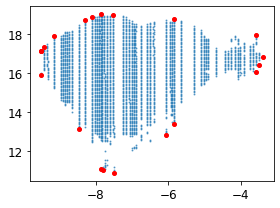

In [21]:
boundary_points = np.vstack(boundary.exterior.coords.xy).T
# boundary_points is a subset of pts corresponding to the concave hull
# Computing the alpha shape

# Plotting the output
plt.figure(figsize=(4, 3))
plt.plot(point_clusters[1][:, 0], point_clusters[1][:, 1], '.', ms = 2, alpha = 0.6)
plt.plot(boundary_points[:, 0], boundary_points[:, 1], 'r.', ms = 8)


# plt.title("Boundary point of of the point cluster 1, tolerance = 4 \n (the boundary points in red)")
save_fig("Boundary point of of the point cluster 1, tolerance = 10")

plt.show()


In [22]:
'''
Copyright (C) 2018  Andre Lester Kruger

ConcaveHull.py is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 2 of the License, or
(at your option) any later version.

ConcaveHull.py is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with ConcaveHull.py.  If not, see <http://www.gnu.org/licenses/>.
'''

import bisect
from collections import OrderedDict
import math
#import numpy as np
import matplotlib.tri as tri
from shapely.geometry import LineString
from shapely.geometry import Polygon
from shapely.ops import linemerge


class ConcaveHull:
    
    def __init__(self):
        self.triangles = {}
        self.crs = {}
        
    
    def loadpoints(self, points):
        #self.points = np.array(points)
        self.points = points
        
        
    def edge(self, key, triangle):
        '''Calculate the length of the triangle's outside edge
        and returns the [length, key]'''
        pos = triangle[1].index(-1)
        if pos==0:
            x1, y1 = self.points[triangle[0][0]]
            x2, y2 = self.points[triangle[0][1]]
        elif pos==1:
            x1, y1 = self.points[triangle[0][1]]
            x2, y2 = self.points[triangle[0][2]]
        elif pos==2:
            x1, y1 = self.points[triangle[0][0]]
            x2, y2 = self.points[triangle[0][2]]
        length = ((x1-x2)**2+(y1-y2)**2)**0.5
        rec = [length, key]
        return rec
        
    
    def triangulate(self):
        
        if len(self.points) < 2:
            raise Exception('CountError: You need at least 3 points to Triangulate')
        
        temp = list(zip(*self.points))
        x, y = list(temp[0]), list(temp[1])
        del(temp)
        
        triang = tri.Triangulation(x, y)
        
        self.triangles = {}
        
        for i, triangle in enumerate(triang.triangles):
            self.triangles[i] = [list(triangle), list(triang.neighbors[i])]
        

    def calculatehull(self, tol=50):
        
        self.tol = tol
        
        if len(self.triangles) == 0:
            self.triangulate()
        
        # All triangles with one boundary longer than the tolerance (self.tol)
        # is added to a sorted deletion list.
        # The list is kept sorted from according to the boundary edge's length
        # using bisect        
        deletion = []    
        self.boundary_vertices = set()
        for i, triangle in self.triangles.items():
            if -1 in triangle[1]:
                for pos, neigh in enumerate(triangle[1]):
                    if neigh == -1:
                        if pos == 0:
                            self.boundary_vertices.add(triangle[0][0])
                            self.boundary_vertices.add(triangle[0][1])
                        elif pos == 1:
                            self.boundary_vertices.add(triangle[0][1])
                            self.boundary_vertices.add(triangle[0][2])
                        elif pos == 2:
                            self.boundary_vertices.add(triangle[0][0])
                            self.boundary_vertices.add(triangle[0][2])
            if -1 in triangle[1] and triangle[1].count(-1) == 1:
                rec = self.edge(i, triangle)
                if rec[0] > self.tol and triangle[1].count(-1) == 1:
                    bisect.insort(deletion, rec)
                    
        while len(deletion) != 0:
            # The triangles with the longest boundary edges will be 
            # deleted first
            item = deletion.pop()
            ref = item[1]
            flag = 0
            
            # Triangle will not be deleted if it already has two boundary edges            
            if self.triangles[ref][1].count(-1) > 1:
                continue
                
            # Triangle will not be deleted if the inside node which is not
            # on this triangle's boundary is already on the boundary of 
            # another triangle
            adjust = {0: 2, 1: 0, 2: 1}            
            for i, neigh in enumerate(self.triangles[ref][1]):
                j = adjust[i]
                if neigh == -1 and self.triangles[ref][0][j] in self.boundary_vertices:
                    flag = 1
                    break
            if flag == 1:
                continue
           
            for i, neigh in enumerate(self.triangles[ref][1]):
                if neigh == -1:
                    continue
                pos = self.triangles[neigh][1].index(ref)
                self.triangles[neigh][1][pos] = -1
                rec = self.edge(neigh, self.triangles[neigh])
                if rec[0] > self.tol and self.triangles[rec[1]][1].count(-1) == 1:
                    bisect.insort(deletion, rec)
                    
            for pt in self.triangles[ref][0]:
                self.boundary_vertices.add(pt)
                                        
            del self.triangles[ref]
            
        self.polygon()
            
                    

    def polygon(self):
        
        edgelines = []
        for i, triangle in self.triangles.items():
            if -1 in triangle[1]:
                for pos, value in enumerate(triangle[1]):
                    if value == -1:
                        if pos==0:
                            x1, y1 = self.points[triangle[0][0]]
                            x2, y2 = self.points[triangle[0][1]]
                        elif pos==1:
                            x1, y1 = self.points[triangle[0][1]]
                            x2, y2 = self.points[triangle[0][2]]
                        elif pos==2:
                            x1, y1 = self.points[triangle[0][0]]
                            x2, y2 = self.points[triangle[0][2]]
                        line = LineString([(x1, y1), (x2, y2)])
                        edgelines.append(line)

        bound = linemerge(edgelines)
    
        self.boundary = Polygon(bound.coords)
        
        
        
#if __name__ == '__main__':

Saving figure Cluster0_Tol6


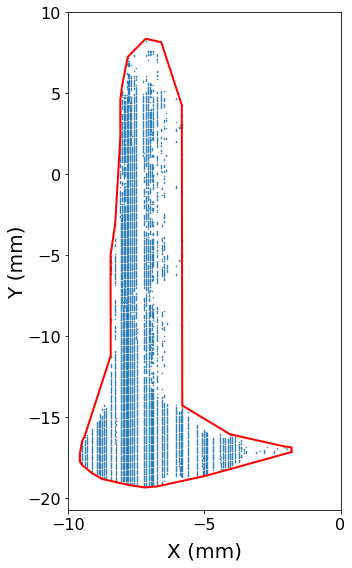

In [28]:
# from ConcaveHull import ConcaveHull

ch0 = ConcaveHull()
# ch1 = ConcaveHull()
# ch2 = ConcaveHull()
ch3 = ConcaveHull()
# ch4 = ConcaveHull()

pts0 = point_clusters[0]
# pts1 = point_clusters[1]
# pts2 = point_clusters[2]
pts3 = point_clusters[3]
# pts4 = point_clusters[4]

ch0.loadpoints(pts0)
# ch1.loadpoints(pts1)
# ch2.loadpoints(pts2)
# ch3.loadpoints(pts3)
# ch4.loadpoints(pts4)

ch0.calculatehull(tol = 6)     ## a hyperparameter for tuning
# ch1.calculatehull(tol = 10)
# ch2.calculatehull(tol = 10)
# ch3.calculatehull(tol = 2)
# ch4.calculatehull(tol = 10)

boundary_points0 = np.vstack(ch0.boundary.exterior.coords.xy).T
# boundary_points1 = np.vstack(ch1.boundary.exterior.coords.xy).T
# boundary_points2 = np.vstack(ch2.boundary.exterior.coords.xy).T
# boundary_points3 = np.vstack(ch3.boundary.exterior.coords.xy).T
# boundary_points4 = np.vstack(ch4.boundary.exterior.coords.xy).T

# Plotting the output
plt.figure(figsize=(5, 8))
# plt.axis('equal')

plt.plot(point_clusters[0][:, 0], point_clusters[0][:, 1], '.', ms = 1, alpha = 1)
# plt.plot(point_clusters[1][:, 0], point_clusters[1][:, 1], '#90EE90', marker='.', ms = 1, alpha = 0.5)
# plt.plot(point_clusters[2][:, 0], point_clusters[2][:, 1], '#0f0f0f80', marker='.', ms = 1, alpha = 0.2)
# plt.plot(point_clusters[3][:, 0], point_clusters[3][:, 1], '.', ms = 3, alpha = 1)
# plt.plot(point_clusters[4][:, 0], point_clusters[4][:, 1], 'y.', ms = 1, alpha = 0.3)

plt.plot(boundary_points0[:, 0], boundary_points0[:, 1], 'r',linewidth=2)
# plt.plot(boundary_points1[:, 0], boundary_points1[:, 1], 'r',linewidth=2)
# plt.plot(boundary_points2[:, 0], boundary_points2[:, 1], 'r',linewidth=2)
# plt.plot(boundary_points3[:, 0], boundary_points3[:, 1], 'r',linewidth=2)
# plt.plot(boundary_points4[:, 0], boundary_points4[:, 1], 'r',linewidth=2)

# Outer boundary
# xd=[-10.5, 10.5, 10.5,-10.5,-10.5]
# yd=[-20.3,-20.3, 20.3, 20.3,-20.3]
plt.xlabel('X (mm)', fontsize=20, labelpad=10)
plt.ylabel('Y (mm)', fontsize=20, labelpad=1)
plt.xticks([-10, -5, 0], fontsize = 16)
plt.yticks([-20, -15, -10, -5, 0, 5, 10], fontsize = 16)




# plt.plot(xd,yd,'k');
# plt.title("The bulge area clusters with contours and the bounding box")
save_fig("Cluster0_Tol6")
plt.show()

Saving figure Cluster3_Tol10


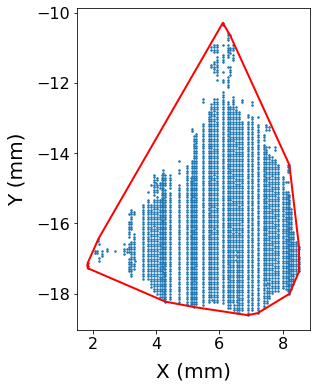

In [33]:
# from ConcaveHull import ConcaveHull

# ch0 = ConcaveHull()
# ch1 = ConcaveHull()
# ch2 = ConcaveHull()
ch3 = ConcaveHull()
# ch4 = ConcaveHull()

# pts0 = point_clusters[0]
# pts1 = point_clusters[1]
# pts2 = point_clusters[2]
pts3 = point_clusters[3]
# pts4 = point_clusters[4]

# ch0.loadpoints(pts0)
# ch1.loadpoints(pts1)
# ch2.loadpoints(pts2)
ch3.loadpoints(pts3)
# ch4.loadpoints(pts4)

# ch0.calculatehull(tol = 10)     ## a hyperparameter for tuning
# ch1.calculatehull(tol = 10)
# ch2.calculatehull(tol = 10)
ch3.calculatehull(tol = 10)
# ch4.calculatehull(tol = 10)

# boundary_points0 = np.vstack(ch0.boundary.exterior.coords.xy).T
# boundary_points1 = np.vstack(ch1.boundary.exterior.coords.xy).T
# boundary_points2 = np.vstack(ch2.boundary.exterior.coords.xy).T
boundary_points3 = np.vstack(ch3.boundary.exterior.coords.xy).T
# boundary_points4 = np.vstack(ch4.boundary.exterior.coords.xy).T

# Plotting the output
plt.figure(figsize=(4.5, 5.5))
# plt.axis('equal')

# plt.plot(point_clusters[0][:, 0], point_clusters[0][:, 1], '.', ms = 1, alpha = 1)
# plt.plot(point_clusters[1][:, 0], point_clusters[1][:, 1], '#90EE90', marker='.', ms = 1, alpha = 0.5)
# plt.plot(point_clusters[2][:, 0], point_clusters[2][:, 1], '#0f0f0f80', marker='.', ms = 1, alpha = 0.2)
plt.plot(point_clusters[3][:, 0], point_clusters[3][:, 1], '.', ms = 3, alpha = 1)
# plt.plot(point_clusters[4][:, 0], point_clusters[4][:, 1], 'y.', ms = 1, alpha = 0.3)

# plt.plot(boundary_points0[:, 0], boundary_points0[:, 1], 'r',linewidth=2)
# plt.plot(boundary_points1[:, 0], boundary_points1[:, 1], 'r',linewidth=2)
# plt.plot(boundary_points2[:, 0], boundary_points2[:, 1], 'r',linewidth=2)
plt.plot(boundary_points3[:, 0], boundary_points3[:, 1], 'r',linewidth=2)
# plt.plot(boundary_points4[:, 0], boundary_points4[:, 1], 'r',linewidth=2)

# Outer boundary
# xd=[-10.5, 10.5, 10.5,-10.5,-10.5]
# yd=[-20.3,-20.3, 20.3, 20.3,-20.3]
plt.xlabel('X (mm)', fontsize=20, labelpad=10)
plt.ylabel('Y (mm)', fontsize=20, labelpad=10)
plt.xticks([2,4,6,8], fontsize=16)
plt.yticks([-18,-16,-14,-12, -10], fontsize=16)



# plt.plot(xd,yd,'k');
# plt.title("The bulge area clusters with contours and the bounding box")
save_fig("Cluster3_Tol10")
plt.show()